In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/img.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)

In [2]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)  # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)  # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)  # Combined X and Y Sobel Edge Detection
grad1 = np.sqrt(sobelx**2 + sobely**2)
grad_norm = (grad1 * 255 / grad1.max()).astype(np.uint8)

In [3]:
# Prewitt Edge Detection

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_blur, -1, kernelx)
img_prewitty = cv2.filter2D(img_blur, -1, kernely)
prewitt = img_prewittx + img_prewitty

In [4]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=50)  # Canny Edge Detection

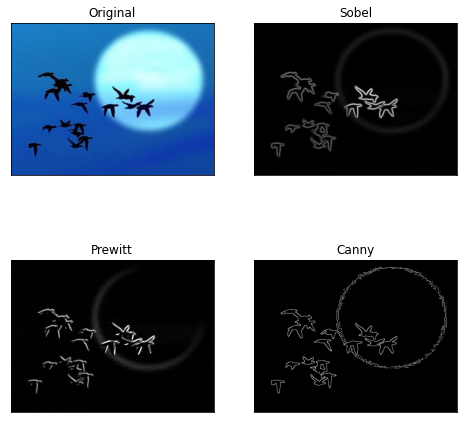

In [5]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(grad_norm, cmap='gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(edges, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.show()